In [52]:
import pandas as pd

In [53]:
#STEP1:make a dataframe 
#eating exercise and their body shape
df=pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body shape'])

In [54]:
df.loc[0]=[1200,1,0,0,2,'Skinny']
df.loc[1]=[2800,1,1,1,1,'Normal']
df.loc[2]=[3500,2,2,1,0,'Fat']
df.loc[3]=[1400,0,1,0,3,'Skinny']
df.loc[4]=[5000,2,2,2,0,'Fat']
df.loc[5]=[1300,0,0,1,2,'Skinny']
df.loc[6]=[3000,1,0,1,1,'Normal']
df.loc[7]=[4000,2,2,2,0,'Fat']
df.loc[8]=[2600,0,2,0,0,'Normal']
df.loc[9]=[3000,1,2,1,1,'Fat']


In [55]:
df.head(3)

,calory,breakfast,lunch,dinner,exercise,body shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat


In [56]:
#STEP2: split feature vectors and labels
#X is the features
X=df[['calory','breakfast','lunch','dinner','exercise']]

In [57]:
#Y is labels
Y= df[['body shape']]

In [58]:
Y.head(5)

,body shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


In [59]:
X.tail(5)

,calory,breakfast,lunch,dinner,exercise
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [60]:
#STEP3: standardizing the features -RESCALING FEATURES TO HAVE THE SAME SCALE
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)
print (x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


In [61]:
#STEP4: FINDING THE COVARIANCE
import numpy as np

In [62]:
#features are columns from x_std
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [63]:
#EIGEN VALUES AND VECTORS DECOMPOSITION FROM COVARIANCE MATRIX
#finding eigenvalues
from numpy import array
from numpy.linalg import eig

In [64]:
#FACTORIZE
eig_vals, eig_vectors = np.linalg.eig(covariance_matrix)

In [65]:
print('Eigenvalues \n%s'%eig_vals)
print('Eigenvectors \n%s'%eig_vectors)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [66]:
#we reduce dimension to 1 dimension,since 1st eigenvector is the largest
eig_vals[0]/sum(eig_vals)

0.7318321731427544

In [67]:
#EIGEN VECTOR FOR HIGHEST EIGEN VALUE
#PROJECT DATA POINT ON SELECTED EIGEN VECTOR
projected_X=x_std.dot(eig_vectors.T[0])

In [68]:
print(projected_X)

[ 2.22600943  0.0181432  -1.76296611  2.73542407 -3.02711544  2.14702579
  0.37142473 -2.59239883  0.39347815 -0.50902498]


In [69]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label']=Y

In [70]:
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

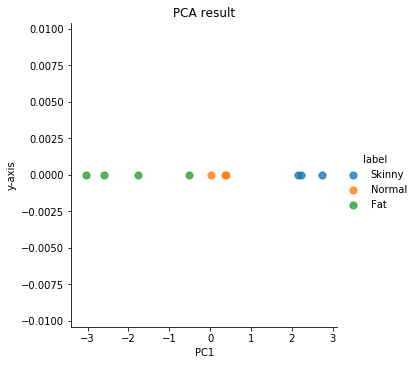

In [72]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,#x-axis,y-axis 
           scatter_kws={"s":50}, #marker size
           hue="label")#color

#title
plt.title('PCA result')

In [ ]:
""